# **9.0 APPENDICES**

Link Dataset ; https://fdc.nal.usda.gov/download-datasets.html

## DATA CLEANING

# Food nutrient

In [1]:
import pandas as pd
import numpy as np

food_nutrient = pd.read_csv('food_nutrient.csv')
food_nutrient.head()

<ipython-input-1-0ef29fcd10b0>:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  food_nutrient = pd.read_csv('food_nutrient.csv')


,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,2201847,319877,1051,56.30,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2201845,319877,1002,1.28,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2201846,319877,1004,19.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2201844,319877,1007,1.98,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2201852,319878,1091,188.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [2]:
food_nutrient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144484 entries, 0 to 144483
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 144484 non-null  int64  
 1   fdc_id             144484 non-null  int64  
 2   nutrient_id        144484 non-null  int64  
 3   amount             144457 non-null  float64
 4   data_points        141190 non-null  float64
 5   derivation_id      144307 non-null  float64
 6   min                14243 non-null   float64
 7   max                14243 non-null   float64
 8   median             14845 non-null   float64
 9   footnote           3 non-null       object 
 10  min_year_acquired  29085 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 12.1+ MB


Check missing and duplicate values

In [3]:
food_nutrient.isnull().sum()

,0
id,0
fdc_id,0
nutrient_id,0
amount,27
data_points,3294
derivation_id,177
min,130241
max,130241
median,129639
footnote,144481


In [4]:
food_nutrient.duplicated().sum()

0

Drop and remove row

In [5]:
columns_to_drop = ['min', 'median', 'max', 'footnote', 'min_year_acquired']
columns_to_drop.extend(columns_to_drop)

# Drop the columns
food_nutrient = food_nutrient.drop(columns=columns_to_drop)

In [6]:
food_nutrient = food_nutrient.dropna(subset=['amount', 'data_points', 'derivation_id'])

In [7]:
food_nutrient.isnull().sum()

,0
id,0
fdc_id,0
nutrient_id,0
amount,0
data_points,0
derivation_id,0


Convert data

In [8]:
#ensure data types are consistent and convert to numeric
food_nutrient['id'] = pd.to_numeric(food_nutrient['id'], errors='coerce')
food_nutrient['fdc_id'] = pd.to_numeric(food_nutrient['fdc_id'], errors='coerce')
food_nutrient['nutrient_id'] = pd.to_numeric(food_nutrient['nutrient_id'], errors='coerce')

food_nutrient = food_nutrient.dropna(subset=['id', 'fdc_id', 'nutrient_id'])

food_nutrient['data_points'] = food_nutrient['data_points'].astype(str)

#clean the data_points column
food_nutrient['data_points'] = food_nutrient['data_points'].str.replace('[,"]', '', regex=True)
food_nutrient['data_points'] = pd.to_numeric(food_nutrient['data_points'], errors='coerce')

#convert to integers
food_nutrient = food_nutrient.astype({
    'id': 'int64',
    'fdc_id': 'int64',
    'nutrient_id': 'int64',
    'amount': 'float64',
    'data_points': 'Int64',
    'derivation_id': 'int64'
})

Save cleaned data to csv

In [9]:
output_path = 'cleaned_food_nutrient.csv'
food_nutrient.to_csv(output_path, index=False)

final_info = food_nutrient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141040 entries, 0 to 144483
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             141040 non-null  int64  
 1   fdc_id         141040 non-null  int64  
 2   nutrient_id    141040 non-null  int64  
 3   amount         141040 non-null  float64
 4   data_points    141040 non-null  Int64  
 5   derivation_id  141040 non-null  int64  
dtypes: Int64(1), float64(1), int64(4)
memory usage: 7.7 MB


# Food

In [10]:
food = pd.read_csv("food.csv")
food.head()

,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
3,319877,sub_sample_food,Hummus,16.0,2019-04-01
4,319878,sub_sample_food,Hummus,16.0,2019-04-01


In [11]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63975 entries, 0 to 63974
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fdc_id            63975 non-null  int64  
 1   data_type         63975 non-null  object 
 2   description       63967 non-null  object 
 3   food_category_id  62053 non-null  float64
 4   publication_date  63975 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


Check missing and duplicated data

In [12]:
food.isnull().sum()

,0
fdc_id,0
data_type,0
description,8
food_category_id,1922
publication_date,0


In [13]:
food.duplicated().sum()

0

Remove Missing Value

In [14]:
food = food.dropna()

In [15]:
food.isnull().sum()

,0
fdc_id,0
data_type,0
description,0
food_category_id,0
publication_date,0


Drop unnecessary column

In [16]:
columns_to_drop = ['publication_date']
food = food.drop(columns=columns_to_drop)

Save cleaned data to csv

In [17]:
cleaned_file_path = 'Cleaned_food.csv'
food.to_csv(cleaned_file_path, index=False)

final_info = food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62045 entries, 0 to 63974
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fdc_id            62045 non-null  int64  
 1   data_type         62045 non-null  object 
 2   description       62045 non-null  object 
 3   food_category_id  62045 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


# Food portion

In [18]:
food_portion = pd.read_csv('food_portion.csv')
food_portion.head()

,id,fdc_id,seq_num,amount,measure_unit_id,portion_description,modifier,gram_weight,data_points,footnote,min_year_acquired
0,118702,319875,NaN,2.0,1001,NaN,NaN,35.8,1.0,NaN,NaN
1,118703,319880,NaN,2.0,1001,NaN,NaN,36.2,1.0,NaN,NaN
2,118704,319881,NaN,2.0,1001,NaN,NaN,33.4,1.0,NaN,NaN
3,118705,319886,NaN,2.0,1001,NaN,NaN,33.2,1.0,NaN,NaN
4,118706,319889,NaN,2.0,1001,NaN,NaN,34.6,1.0,NaN,NaN


In [19]:
food_portion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10678 non-null  int64  
 1   fdc_id               10678 non-null  int64  
 2   seq_num              223 non-null    float64
 3   amount               10678 non-null  float64
 4   measure_unit_id      10678 non-null  int64  
 5   portion_description  1 non-null      object 
 6   modifier             8714 non-null   object 
 7   gram_weight          10678 non-null  float64
 8   data_points          10609 non-null  float64
 9   footnote             0 non-null      float64
 10  min_year_acquired    187 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 917.8+ KB


Check missing and duplicate values

In [20]:
food_portion.isnull().sum()

,0
id,0
fdc_id,0
seq_num,10455
amount,0
measure_unit_id,0
portion_description,10677
modifier,1964
gram_weight,0
data_points,69
footnote,10678


In [21]:
food_portion.duplicated().sum()

0

In [22]:
columns_to_drop = ['seq_num', 'portion_description', 'footnote', 'min_year_acquired']
columns_to_drop.extend(columns_to_drop)

food_portion = food_portion.drop(columns=columns_to_drop)

In [23]:
food_portion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10678 non-null  int64  
 1   fdc_id           10678 non-null  int64  
 2   amount           10678 non-null  float64
 3   measure_unit_id  10678 non-null  int64  
 4   modifier         8714 non-null   object 
 5   gram_weight      10678 non-null  float64
 6   data_points      10609 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 584.1+ KB


In [24]:
food_portion.isnull().sum()

,0
id,0
fdc_id,0
amount,0
measure_unit_id,0
modifier,1964
gram_weight,0
data_points,69


Replace missing values with NA (modifier and data_points column)

In [25]:
food_portion = food_portion.fillna('NA')

In [26]:
missing_values = food_portion.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [27]:
print(food_portion.head())

       id  fdc_id  amount  measure_unit_id modifier  gram_weight data_points
0  118702  319875     2.0             1001       NA         35.8         1.0
1  118703  319880     2.0             1001       NA         36.2         1.0
2  118704  319881     2.0             1001       NA         33.4         1.0
3  118705  319886     2.0             1001       NA         33.2         1.0
4  118706  319889     2.0             1001       NA         34.6         1.0


In [28]:
output_path = 'cleaned_food_portion.csv'
food_portion.to_csv(output_path, index=False)

food_portion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10678 non-null  int64  
 1   fdc_id           10678 non-null  int64  
 2   amount           10678 non-null  float64
 3   measure_unit_id  10678 non-null  int64  
 4   modifier         10678 non-null  object 
 5   gram_weight      10678 non-null  float64
 6   data_points      10678 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 584.1+ KB


# Combining the dataset

In [29]:
import pandas as pd

food = pd.read_csv('Cleaned_food.csv')
food_portion = pd.read_csv('cleaned_food_portion.csv')
food_nutrient = pd.read_csv('cleaned_food_nutrient.csv')

#convert 'modifier' column to string type
food_portion['modifier'] = food_portion['modifier'].astype(str)

#aggregate food portion details
portion_summary = food_portion.groupby('fdc_id').agg({
    'modifier': ', '.join,
    'gram_weight': 'mean'
}).reset_index()

#merge food with portion
combined_data = food.merge(portion_summary, on='fdc_id', how='left')

#assuming 'fdc_id' in food_nutrient
food_nutrient_summary = food_nutrient.groupby('fdc_id').agg({
    'amount': 'mean'
}).reset_index()

#merge food with food nutrient
combined_data = combined_data.merge(food_nutrient_summary, on='fdc_id', how='left')

for column in combined_data.columns:
    if combined_data[column].dtype in ['float64', 'int64']:
        combined_data[column] = combined_data[column].fillna(combined_data[column].mean())
    else:
        combined_data[column] = combined_data[column].fillna("Unknown")

columns_to_drop = ['description', 'modifier']
columns_to_drop.extend(columns_to_drop)
combined_data = combined_data.drop(columns=columns_to_drop)

#save combined data
combined_data.to_csv('combined_dataset.csv', index=False)

print(f"Final dataset shape: {combined_data.shape}")
print(combined_data.head())


Final dataset shape: (62045, 5)
   fdc_id           data_type  food_category_id  gram_weight      amount
0  319874         sample_food              16.0   132.795446   60.455744
1  319875  market_acquisition              16.0    35.800000   60.455744
2  319876  market_acquisition              16.0   132.795446   60.455744
3  319877     sub_sample_food              16.0   132.795446   19.640000
4  319878     sub_sample_food              16.0   132.795446  120.813333


Check Missing value of the combined dataset

In [30]:
combined_data.isnull().sum()

,0
fdc_id,0
data_type,0
food_category_id,0
gram_weight,0
amount,0


In [31]:
combined_data.duplicated().sum()

0

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#fit and transform
combined_data['data_type'] = label_encoder.fit_transform(combined_data['data_type'])

print(combined_data.head())
combined_data.to_csv('combined_dataset_encoded.csv', index=False)

   fdc_id  data_type  food_category_id  gram_weight      amount
0  319874          3              16.0   132.795446   60.455744
1  319875          2              16.0    35.800000   60.455744
2  319876          2              16.0   132.795446   60.455744
3  319877          4              16.0   132.795446   19.640000
4  319878          4              16.0   132.795446  120.813333


# EDA

In [33]:
print(combined_data.describe().round(0))

          fdc_id  data_type  food_category_id  gram_weight   amount
count    62045.0    62045.0           62045.0      62045.0  62045.0
mean   1653688.0        4.0              10.0        133.0     60.0
std     887263.0        1.0               6.0         24.0    452.0
min     319874.0        0.0               1.0          1.0      0.0
25%     746908.0        4.0               5.0        133.0      0.0
50%    2003118.0        4.0              11.0        133.0      4.0
75%    2349534.0        4.0              14.0        133.0     60.0
max    2687762.0        4.0              25.0       1180.0  40700.0


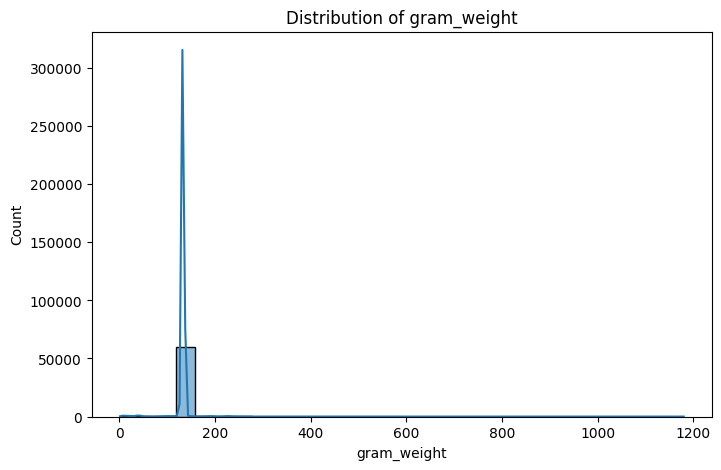

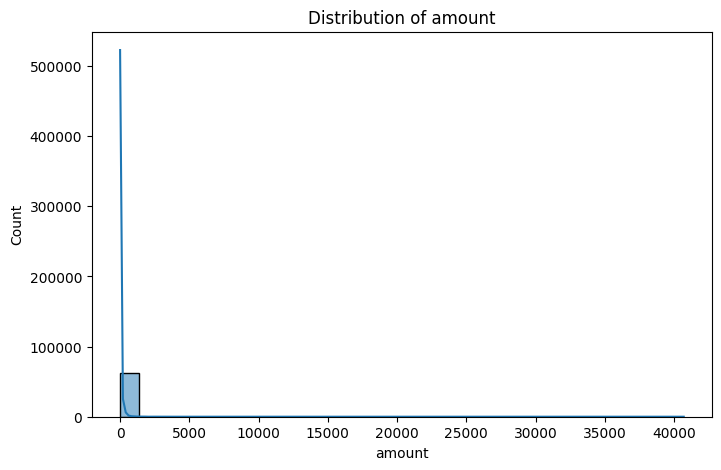

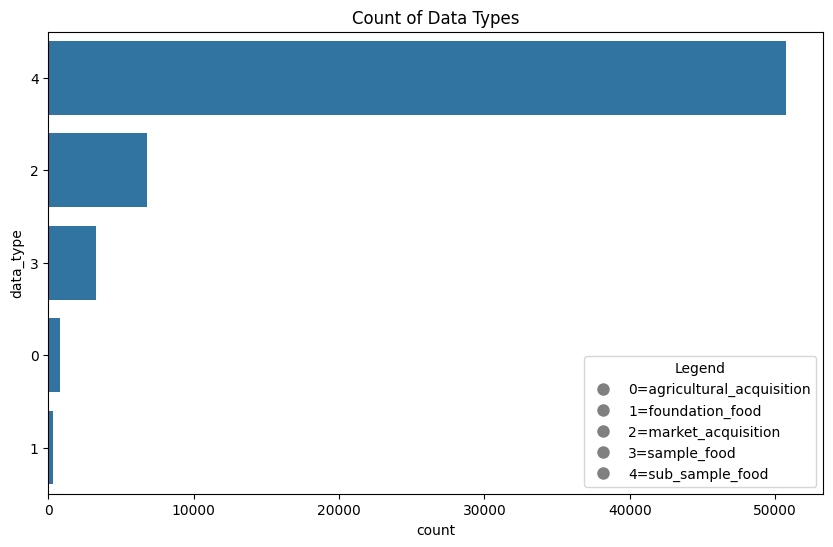

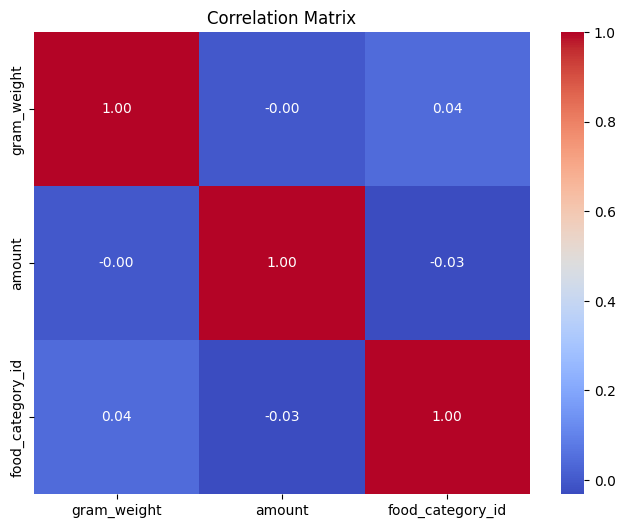

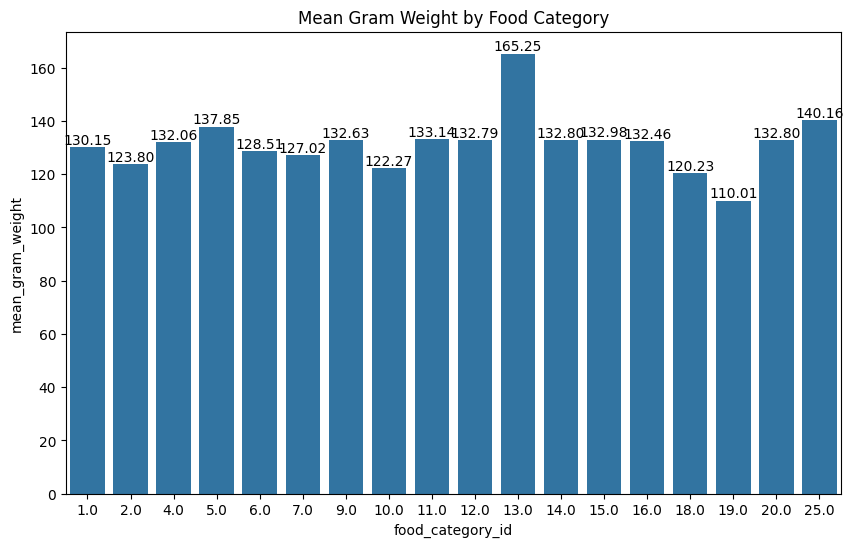

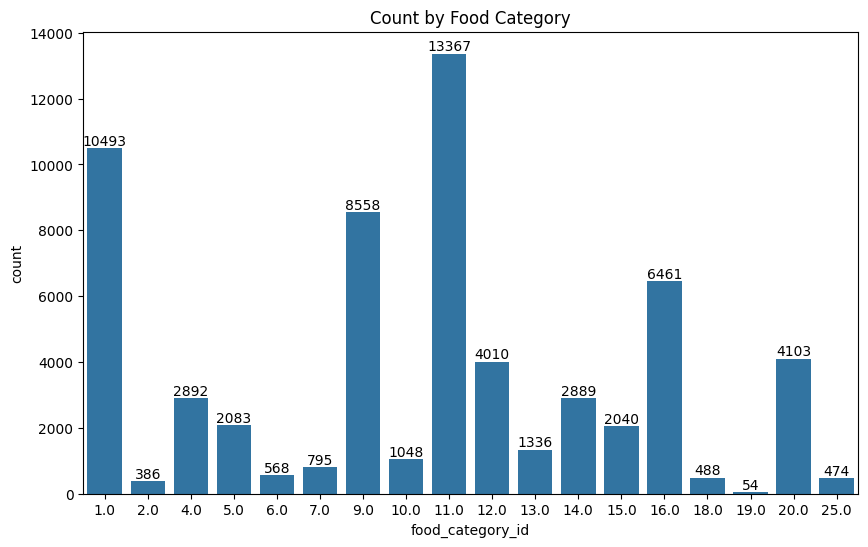

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#distribution analysis
def plot_distributions(data):
    #histograms
    numerical_cols = ['gram_weight', 'amount']
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

    #count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(y='data_type', data=data, order=data['data_type'].value_counts().index)
    plt.title("Count of Data Types")
    legend_labels = [
        "0=agricultural_acquisition",
        "1=foundation_food",
        "2=market_acquisition",
        "3=sample_food",
        "4=sub_sample_food"
    ]
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10) for _ in legend_labels]
    plt.legend(handles, legend_labels, title="Legend", loc="lower right", fontsize=10)
    plt.show()

plot_distributions(combined_data)

# Correlation Analysis
def correlation_analysis(combined_data):
    numerical_cols = ['gram_weight', 'amount', 'food_category_id']
    corr_matrix = combined_data[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

correlation_analysis(combined_data)

# Grouped Insights
def grouped_insights(data):
    grouped = data.groupby('food_category_id').agg(
        mean_gram_weight=('gram_weight', 'mean'),
        mean_amount=('amount', 'mean'),
        count=('food_category_id', 'count')
    ).reset_index()

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='food_category_id', y='mean_gram_weight', data=grouped.sort_values('mean_gram_weight', ascending=False)
    )
    plt.title("Mean Gram Weight by Food Category")
    for p in ax.patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom')
    plt.show()

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='food_category_id', y='count', data=grouped.sort_values('count', ascending=False)
    )
    plt.title("Count by Food Category")
    for p in ax.patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
    plt.show()


grouped_insights(combined_data)

# **Data Pre-Processing**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
combined_data = pd.read_csv('combined_dataset_encoded.csv')

#assign target features
X = combined_data.drop('food_category_id', axis=1)
y = combined_data['food_category_id']


In [36]:
# Split into train and test sets (80% train, 20% test) (Data partitioning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Preprocessing for numerical features (standardize)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = StandardScaler()

In [38]:
# Standardize the features

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical) # Fit and transform on numerical data
X_test_scaled = scaler.transform(X_test_numerical)     # Transform test data using the same scaler

# Model Training

# Decision Tree

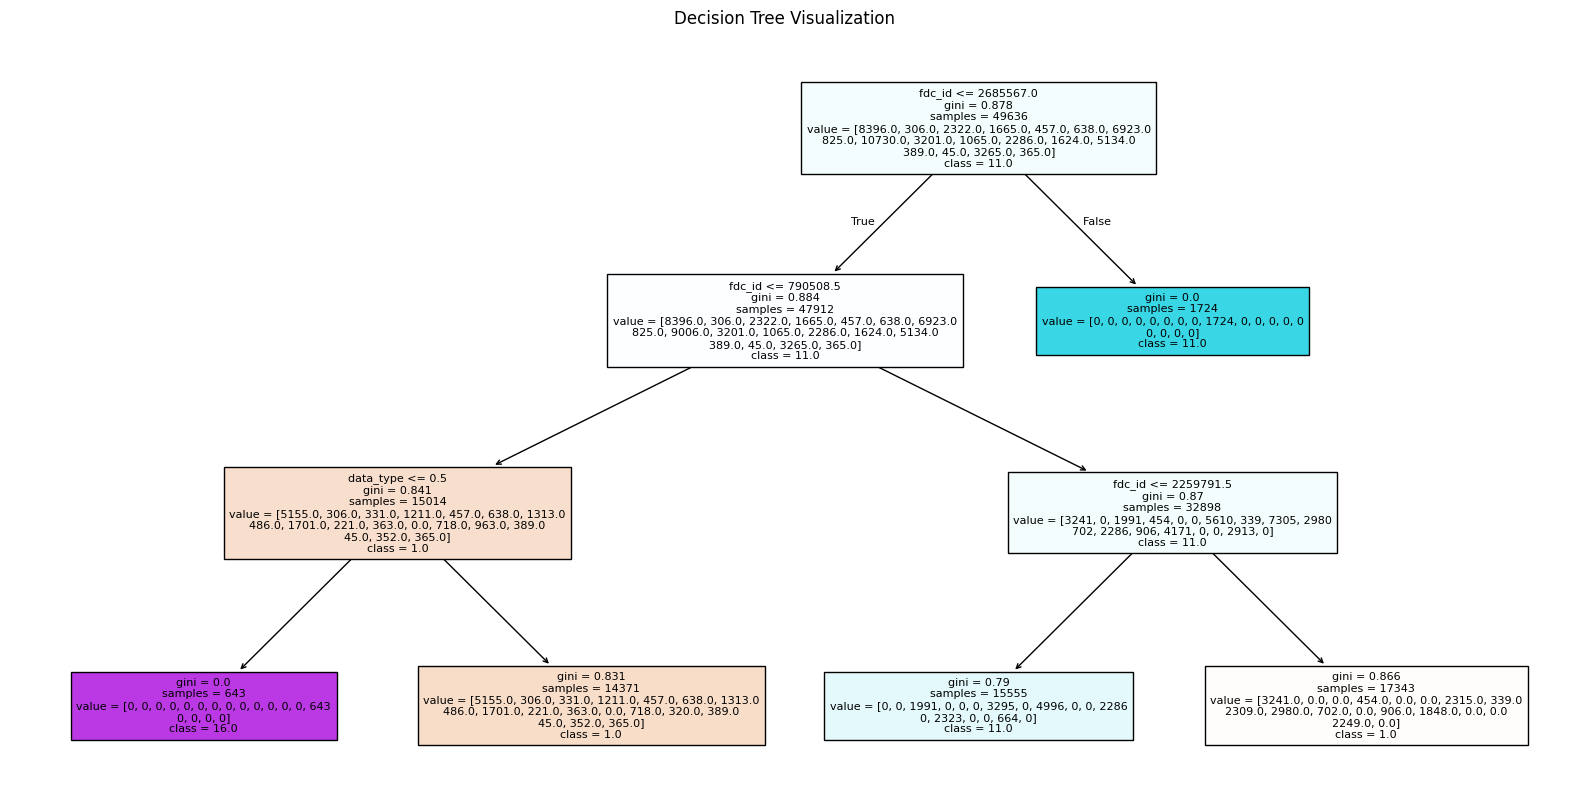

accuracy: 0.31396567007816906
Mean Squared Error (MSE): 75.4060
Root Mean Squared Error (RMSE): 8.6837
Mean Absolute Error (MAE): 6.2528
R-Squared (R2):-1.3263


In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score


#build and train decision tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=4)
clf.fit(X_train, y_train)

#visualize
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in clf.classes_], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

#prediction
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

#calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared (R2):{r2:.4f}")

#  K-NEAREST NEIGHBOUR (KNN)

Fitting the pipeline using Knn

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 40))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',
                    return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
{'n_neighbors': 1}


In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np

# Pipeline Estimator
pipeline = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=4, metric='euclidean'))

# Fit the model
pipeline.fit(X_train, y_train)
knn_pred = pipeline.predict(X_test)

# Model scores on test and training data
print('Model test Score: %.3f, ' % pipeline.score(X_test, y_test),
      'Model training Score: %.3f' % pipeline.score(X_train, y_train))

# Calculate accuracy score
accuracy = accuracy_score(y_test, knn_pred)

# Evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

# Print evaluation metrics
print('Accuracy Score: %.4f' % accuracy)
print('Mean Squared Error (MSE): %.4f' % mse)
print('Root Mean Squared Error (RMSE): %.4f' % rmse)
print('Mean Absolute Error (MAE): %.4f' % mae)
print('R-squared (R2): %.4f' % r2)

Model test Score: 0.866,  Model training Score: 0.921
Accuracy Score: 0.8661
Mean Squared Error (MSE): 7.7604
Root Mean Squared Error (RMSE): 2.7858
Mean Absolute Error (MAE): 0.8427
R-squared (R2): 0.7606


# **RANDOM FOREST**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Model scores on test and training data
print('Model test Score: %.3f, ' %rf_model.score(X_test_scaled, y_test),
      'Model training Score: %.3f' %rf_model.score(X_train_scaled, y_train))

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate MSE, MAE, RMSE for classification labels
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)

# Print the error metrics
print("\nError Metrics for Random Forest Classifier:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Model test Score: 0.972,  Model training Score: 0.995

Random Forest Model Performance:
Accuracy: 0.9723
Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      2097
         2.0       0.96      1.00      0.98        80
         4.0       1.00      0.99      1.00       570
         5.0       0.97      0.97      0.97       418
         6.0       0.99      1.00      1.00       111
         7.0       0.96      0.97      0.97       157
         9.0       0.98      0.99      0.99      1635
        10.0       0.97      0.90      0.93       223
        11.0       0.99      0.98      0.98      2637
        12.0       0.96      0.99      0.97       809
        13.0       0.93      0.98      0.96       271
        14.0       0.86      0.88      0.87       603
        15.0       1.00      1.00      1.00       416
        16.0       0.94      0.91      0.92      1327
        18.0       1.00      0.97      0.98        99
       

# **XGBOOST**

In [43]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Map target classes to integers starting from 0
class_mapping = {label: idx for idx, label in enumerate(sorted(y.unique()))}
inverse_class_mapping = {idx: label for label, idx in class_mapping.items()}

# Remap y using the class_mapping
y_mapped = y.map(class_mapping)

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)  # Instantiate SMOTE object
X_resampled, y_resampled = smote.fit_resample(X, y_mapped)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(class_mapping),  # Use the number of unique classes
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions and map back to original labels
y_pred = xgb_model.predict(X_test)
y_pred_original = pd.Series(y_pred).map(inverse_class_mapping)
y_test_original = pd.Series(y_test).map(inverse_class_mapping)

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
classification_rep = classification_report(y_test_original, y_pred_original)
conf_matrix = confusion_matrix(y_test_original, y_pred_original)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Calculate regression metrics (treating class labels as numerical values)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression metrics
print('Mean Squared Error (MSE): %.4f' % mse)
print('Root Mean Squared Error (RMSE): %.4f' % rmse)
print('Mean Absolute Error (MAE): %.4f' % mae)
print('R-squared (R2): %.4f' % r2)

Accuracy: 0.9176883753792444
Classification Report:
               precision    recall  f1-score   support

         1.0       0.89      0.93      0.91      2638
         2.0       0.98      0.99      0.98      2649
         4.0       0.94      0.97      0.95      2616
         5.0       0.94      0.86      0.89      2700
         6.0       0.99      0.98      0.98      2635
         7.0       0.92      0.96      0.94      2680
         9.0       0.87      0.85      0.86      2697
        10.0       0.91      0.85      0.88      2554
        11.0       0.89      0.77      0.82      2686
        12.0       0.87      0.93      0.90      2730
        13.0       0.82      0.95      0.88      2666
        14.0       0.79      0.95      0.86      2757
        15.0       1.00      1.00      1.00      2623
        16.0       0.89      0.65      0.75      2665
        18.0       0.98      0.98      0.98      2758
        19.0       0.99      0.99      0.99      2737
        20.0       0.91     

# **SVM**

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with SVM for classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42))
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")
# Calculate R-squared (R2) for regression tasks
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")




Model Accuracy: 0.3360
Mean Squared Error: 42.5323
Mean Absolute Error: 4.3917
Root Mean Squared Error: 6.5217
R-squared (R2): -0.3121


# **Recommendation System**

In [47]:
!pip install gradio
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import gradio as gr

# Preprocess the data
def preprocess_data(data):
    X = data[['amount', 'gram_weight']]  # Features for the model
    y = data['food_category_id']  # Target variable
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, scaler

# Train Random Forest model
X_scaled, y, scaler = preprocess_data(combined_data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Map food categories
food_category_map = {
    1: "Dairy & Egg Products",
    2: "Spices & Herbs",
    4: "Fats",
    5: "Baby Foods",
    6: "Poultry Products",
    7: "Soups",
    9: "Sausage",
    10: "Breakfast Cereals",
    11: "Fruits & Fruit Juices",
    12: "Nuts",
    13: "Beef Products",
    14: "Beverages",
    15: "Finfish",
    16: "Legumes",
    18: "Baked Products",
    19: "Sweets",
    20: "Cereal Grains",
    25: "Restaurant Foods"
}

# Calculate daily nutrient needs based on weight, age, activity level, and goal
def calculate_nutrient_needs(weight_kg, age, activity_level, goal):

    if age < 18:
        calories_needed = 25 * weight_kg
    elif age < 60:
        if activity_level == 'never':
            calories_needed = 20 * weight_kg
        elif activity_level == 'often':
            calories_needed = 30 * weight_kg
        else:
            calories_needed = 25 * weight_kg
    else:  # for elderly (age >= 60)
        calories_needed = 18 * weight_kg

    if goal == 'gain':
        protein_needed = 2.0 * weight_kg
    else:
        protein_needed = 1.5 * weight_kg

    fat_needed = 0.8 * weight_kg
    carbs_needed = 3 * weight_kg if goal != 'lose' else 2 * weight_kg
    return calories_needed, protein_needed, fat_needed, carbs_needed

# Recommend foods using the Random Forest model
def recommend_foods_rf(weight_kg, age, activity_level, goal):
    # Calculate nutrient needs
    calories_needed, protein_needed, fat_needed, carbs_needed = calculate_nutrient_needs(weight_kg, age, activity_level, goal)

    # Create a feature vector based on user's needs
    user_features = [[calories_needed, protein_needed]]
    user_features_scaled = scaler.transform(user_features)

    # Predict food categories
    predictions = rf_model.predict(user_features_scaled)

    # Filter foods based on predicted categories
    recommended_foods = combined_data[combined_data['food_category_id'].isin(predictions)]
    recommended_foods['food_category'] = recommended_foods['food_category_id'].map(food_category_map)
    recommended_foods = recommended_foods[['food_category', 'amount', 'gram_weight']]
    recommended_foods['amount'] = recommended_foods['amount'].round(4)
    recommended_foods['gram_weight'] = recommended_foods['gram_weight'].round(4)

    # Sort the foods
    recommended_foods = recommended_foods.sort_values(by='amount', ascending=False).head(1)

    return recommended_foods


# Define Gradio interface function
def food_recommendation_gui(weight_kg, age, goal, activity_level):
    recommendations = recommend_foods_rf(weight_kg, age, activity_level, goal)
    return recommendations

# Create Gradio interface
interface = gr.Interface(
    fn=food_recommendation_gui,
    inputs=[
        gr.Number(label="Weight (kg)", value=70),
        gr.Number(label="Age (years)", value=25),
        gr.Radio(choices=["lose", "maintain", "gain"], label="Goal"),
        gr.Radio(choices=["never", "regularly", "often"], label="Activity Level")
    ],
    outputs=gr.Dataframe(headers=["Food Category", "Nutrient Amount", "Weight (grams)"]),
    title="Dietary Recommendation System",
    description="Enter your weight, age, goal, and activity level to get food recommendations."
)

# Launch the app
interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b962b984df3f7b62fe.gradio.live

This share link expires in 72 hours. 